In [188]:
import meep as mp
import matplotlib.pyplot as plt
import numpy as np

In [189]:
lam = 1.55 
cell_size = mp.Vector3(4*lam,4*lam,0)

In [190]:
epsilon_input_file = './input_wave_guide'

In [191]:
kx = 0.4    # initial guess for wavevector in x-direction of eigenmode
fsrc =1/1.55 # frequency of eigenmode or constant-amplitude source
rot_angle = 0
kpoint = mp.Vector3(kx).rotate(mp.Vector3(z=1), rot_angle) # Rotate the vector by the specified amount

bnum = 1    # band number of eigenmode
df = .1
sources = [mp.EigenModeSource(src=mp.GaussianSource(fsrc,fwidth=df),
                                  center=mp.Vector3(-2*lam+1.6,0),
                                  size=mp.Vector3(y=1),
                                  direction=mp.NO_DIRECTION,
                                  component=mp.Ez,
                                  eig_kpoint=kpoint,
                                  eig_band=bnum,
                                  eig_parity=mp.EVEN_Y+mp.ODD_Z if rot_angle == 0 else mp.ODD_Z,
                                  eig_match_freq=True)]


In [192]:
pml_layers = [mp.PML(1.2)]

In [193]:
resolution = 60

-----------
Initializing structure...
read in 218x218x1 epsilon-input-file "./input_wave_guide"
time for choose_chunkdivision = 0.00206502 s
Working in 2D dimensions.
Computational cell is 6.2 x 6.2 x 0 with resolution 60
time for set_epsilon = 0.295529 s
-----------
    linmin: converged after 8 iterations.
    linmin: converged after 5 iterations.
    linmin: converged after 4 iterations.
MPB solved for frequency_1(0.4,0,0) = 0.144217 after 6 iters
    linmin: converged after 10 iterations.
    linmin: converged after 6 iterations.
    linmin: converged after 4 iterations.
    linmin: converged after 7 iterations.
    linmin: converged after 5 iterations.
    linmin: converged after 3 iterations.
    linmin: converged after 8 iterations.
    linmin: converged after 4 iterations.
    linmin: converged after 4 iterations.
MPB solved for frequency_1(1.82831,0,0) = 0.545979 after 20 iters
    linmin: converged after 4 iterations.
    linmin: converged after 4 iterations.
    linmin: conv

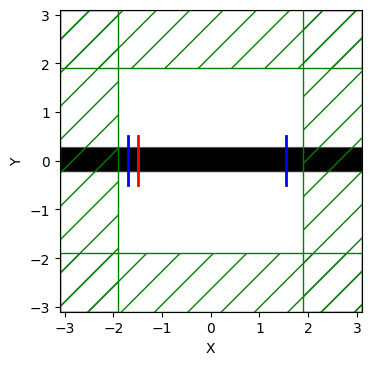

In [194]:
sim = mp.Simulation(cell_size=cell_size,
                    resolution=resolution,
                    boundary_layers=pml_layers,
                    sources=sources,
                    epsilon_input_file = epsilon_input_file)
nfreq = 100  # number of frequencies at which to compute flux
refl_fr = mp.FluxRegion(center=mp.Vector3(-2*lam+1.4,0,0), size=mp.Vector3(0,1,0))   
refl = sim.add_flux(fsrc, df, nfreq, refl_fr)


# transmitted fluxz
tran_fr = mp.FluxRegion(center=mp.Vector3(lam,-0,0), size=mp.Vector3(0,1,0))
tran = sim.add_mode_monitor(fsrc, df, nfreq, tran_fr)

sim.init_sim()
f = plt.figure(dpi=100)
sim.plot2D(ax=f.gca())
plt.show()

In [195]:
pt = mp.Vector3(-lam,0)
sim.run(until_after_sources=mp.stop_when_fields_decayed(50,mp.Ez,pt,1e-3))

# for normalization run, save flux fields data for reflection plane
straight_refl_data = sim.get_flux_data(refl)
# save incident power for transmission plane
straight_tran_flux = mp.get_fluxes(tran)

on time step 1741 (time=14.5083), 0.00229846 s/step
on time step 3324 (time=27.7), 0.00252701 s/step
on time step 5190 (time=43.25), 0.00214438 s/step
field decay(t = 50.00833333333333): 1.0000922648950763 / 1.0000922648950763 = 1.0
on time step 6769 (time=56.4083), 0.00253354 s/step
on time step 8652 (time=72.1), 0.00212446 s/step
on time step 10556 (time=87.9667), 0.00210161 s/step
field decay(t = 100.01666666666667): 1.007690124224367 / 1.007690124224367 = 1.0
on time step 12498 (time=104.15), 0.00206036 s/step
on time step 14493 (time=120.775), 0.00200524 s/step
on time step 16470 (time=137.25), 0.00202409 s/step
field decay(t = 150.025): 1.0701387822249566e-10 / 1.007690124224367 = 1.061972084968737e-10
run 0 finished at t = 150.025 (18003 timesteps)


-----------
Initializing structure...
read in 218x218x1 epsilon-input-file "./ninety_degree_bend"
time for choose_chunkdivision = 0.000441535 s
Working in 2D dimensions.
Computational cell is 6.2 x 6.2 x 0 with resolution 60
time for set_epsilon = 0.286734 s
-----------
    linmin: converged after 8 iterations.
    linmin: converged after 5 iterations.
    linmin: converged after 4 iterations.
MPB solved for frequency_1(0.4,0,0) = 0.144217 after 6 iters
    linmin: converged after 10 iterations.
    linmin: converged after 6 iterations.
    linmin: converged after 4 iterations.
    linmin: converged after 7 iterations.
    linmin: converged after 5 iterations.
    linmin: converged after 3 iterations.
    linmin: converged after 8 iterations.
    linmin: converged after 4 iterations.
    linmin: converged after 4 iterations.
MPB solved for frequency_1(1.82831,0,0) = 0.545979 after 20 iters
    linmin: converged after 4 iterations.
    linmin: converged after 4 iterations.
    linmin: c

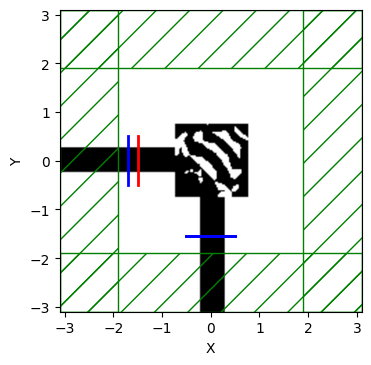

In [196]:
sim.reset_meep()
epsilon_input_file = './ninety_degree_bend'
sim = mp.Simulation(cell_size=cell_size,
                    resolution=resolution,
                    boundary_layers=pml_layers,
                    sources=sources,
                     epsilon_input_file = epsilon_input_file)

nfreq = 100  # number of frequencies at which to compute flux
dev_refl_fr = mp.FluxRegion(center=mp.Vector3(-2*lam+1.4,0,0), size=mp.Vector3(0,1,0))   

dev_refl = sim.add_flux(fsrc, df, nfreq, dev_refl_fr)

# transmitted flux
dev_tran_fr = mp.FluxRegion(center=mp.Vector3(0,-lam,0), size=mp.Vector3(1,0,0))
dev_tran = sim.add_mode_monitor(fsrc, df, nfreq, dev_tran_fr)
dev_t_tran = sim.add_flux(fsrc, df, nfreq, dev_tran_fr)
sim.init_sim()
f = plt.figure(dpi=100)
sim.plot2D(ax=f.gca())
plt.show()

In [197]:
# for normal run, load negated fields to subtract incident from refl. fields
sim.load_minus_flux_data(dev_refl, straight_refl_data)
pt = mp.Vector3(-lam,0)
#sim.run(until_after_sources=mp.stop_when_fields_decayed(50,mp.Ez,pt,1e-3))
sim.run(mp.at_beginning(mp.output_epsilon),
        mp.to_appended("ez", mp.at_every(0.6, mp.output_efield_z)),
        until=200)

creating output file "./eps-000000000.h5"...
creating output file "./ez.h5"...
Meep progress: 9.25/200.0 = 4.6% done in 4.0s, 82.5s to go
on time step 1320 (time=11), 0.00303042 s/step
Meep progress: 20.4/200.0 = 10.2% done in 8.0s, 70.6s to go
on time step 2664 (time=22.2), 0.00298178 s/step
Meep progress: 32.141666666666666/200.0 = 16.1% done in 12.0s, 62.8s to go
on time step 4045 (time=33.7083), 0.00289753 s/step
Meep progress: 44.075/200.0 = 22.0% done in 16.0s, 56.7s to go
on time step 5543 (time=46.1917), 0.00267055 s/step
Meep progress: 57.391666666666666/200.0 = 28.7% done in 20.0s, 49.8s to go
on time step 7122 (time=59.35), 0.00253362 s/step
Meep progress: 70.15/200.0 = 35.1% done in 24.0s, 44.5s to go
on time step 8608 (time=71.7333), 0.00269277 s/step
Meep progress: 82.2/200.0 = 41.1% done in 28.1s, 40.2s to go
on time step 10080 (time=84), 0.00273521 s/step
Meep progress: 94.2/200.0 = 47.1% done in 32.1s, 36.0s to go
on time step 11540 (time=96.1667), 0.00273979 s/step
Me

In [198]:
bandNumbers = [1,2,3]
modalAnalysisResult = sim.get_eigenmode_coefficients(dev_tran,bandNumbers,eig_parity=mp.ODD_Z)
trans_coeffs = modalAnalysisResult.alpha
flux_freqs = mp.get_flux_freqs(dev_refl)
dev_tran_flux = mp.get_fluxes(dev_tran)

    linmin: converged after 8 iterations.
    linmin: converged after 6 iterations.
    linmin: converged after 6 iterations.
    linmin: converged after 5 iterations.
MPB solved for frequency_1(0,2.16639,0) = 0.630297 after 15 iters
    linmin: converged after 4 iterations.
MPB solved for frequency_1(0,2.03465,0) = 0.595181 after 8 iters
    linmin: converged after 2 iterations.
MPB solved for frequency_1(0,2.03458,0) = 0.595161 after 3 iters
Dominant planewave for band 1: (0.000000,2.034578,0.000000)
    linmin: converged after 9 iterations.
    linmin: converged after 7 iterations.
    linmin: converged after 6 iterations.
    linmin: converged after 4 iterations.
MPB solved for frequency_1(0,2.03837,0) = 0.596171 after 14 iters
    linmin: converged after 4 iterations.
MPB solved for frequency_1(0,2.03837,0) = 0.596171 after 1 iters
Dominant planewave for band 1: (0.000000,2.038369,0.000000)
    linmin: converged after 9 iterations.
    linmin: converged after 7 iterations.
    lin

    linmin: converged after 5 iterations.
    linmin: converged after 4 iterations.
MPB solved for frequency_1(0,2.11038,0) = 0.615363 after 15 iters
    linmin: converged after 2 iterations.
MPB solved for frequency_1(0,2.11038,0) = 0.615363 after 1 iters
Dominant planewave for band 1: (0.000000,2.110382,0.000000)
    linmin: converged after 7 iterations.
    linmin: converged after 6 iterations.
    linmin: converged after 5 iterations.
    linmin: converged after 4 iterations.
MPB solved for frequency_1(0,2.11417,0) = 0.616373 after 15 iters
    linmin: converged after 4 iterations.
MPB solved for frequency_1(0,2.11417,0) = 0.616373 after 1 iters
Dominant planewave for band 1: (0.000000,2.114171,0.000000)
    linmin: converged after 7 iterations.
    linmin: converged after 6 iterations.
    linmin: converged after 5 iterations.
    linmin: converged after 4 iterations.
MPB solved for frequency_1(0,2.11796,0) = 0.617384 after 15 iters
    linmin: converged after 4 iterations.
MPB so

MPB solved for frequency_1(0,2.18614,0) = 0.635565 after 1 iters
Dominant planewave for band 1: (0.000000,2.186137,0.000000)
    linmin: converged after 8 iterations.
    linmin: converged after 7 iterations.
    linmin: converged after 6 iterations.
    linmin: converged after 5 iterations.
MPB solved for frequency_1(0,2.18992,0) = 0.636575 after 15 iters
    linmin: converged after 4 iterations.
MPB solved for frequency_1(0,2.18992,0) = 0.636575 after 1 iters
Dominant planewave for band 1: (0.000000,2.189923,0.000000)
    linmin: converged after 8 iterations.
    linmin: converged after 7 iterations.
    linmin: converged after 6 iterations.
    linmin: converged after 5 iterations.
MPB solved for frequency_1(0,2.19371,0) = 0.637586 after 15 iters
    linmin: converged after 4 iterations.
MPB solved for frequency_1(0,2.19371,0) = 0.637586 after 1 iters
Dominant planewave for band 1: (0.000000,2.193709,0.000000)
    linmin: converged after 8 iterations.
    linmin: converged after 7 i

    linmin: converged after 5 iterations.
    linmin: converged after 5 iterations.
MPB solved for frequency_1(0,2.26562,0) = 0.656777 after 15 iters
    linmin: converged after 4 iterations.
MPB solved for frequency_1(0,2.26562,0) = 0.656777 after 1 iters
Dominant planewave for band 1: (0.000000,2.265623,0.000000)
    linmin: converged after 8 iterations.
    linmin: converged after 7 iterations.
    linmin: converged after 5 iterations.
    linmin: converged after 5 iterations.
MPB solved for frequency_1(0,2.26941,0) = 0.657788 after 15 iters
    linmin: converged after 4 iterations.
MPB solved for frequency_1(0,2.26941,0) = 0.657788 after 1 iters
Dominant planewave for band 1: (0.000000,2.269407,0.000000)
    linmin: converged after 8 iterations.
    linmin: converged after 7 iterations.
    linmin: converged after 6 iterations.
    linmin: converged after 5 iterations.
MPB solved for frequency_1(0,2.27319,0) = 0.658798 after 15 iters
    linmin: converged after 2 iterations.
MPB so

MPB solved for frequency_1(0,2.34127,0) = 0.676979 after 1 iters
Dominant planewave for band 1: (0.000000,2.341269,0.000000)
    linmin: converged after 8 iterations.
    linmin: converged after 8 iterations.
    linmin: converged after 6 iterations.
    linmin: converged after 5 iterations.
MPB solved for frequency_1(0,2.34505,0) = 0.67799 after 16 iters
    linmin: converged after 2 iterations.
MPB solved for frequency_1(0,2.34505,0) = 0.67799 after 1 iters
Dominant planewave for band 1: (0.000000,2.345050,0.000000)
    linmin: converged after 8 iterations.
    linmin: converged after 8 iterations.
    linmin: converged after 5 iterations.
    linmin: converged after 5 iterations.
MPB solved for frequency_1(0,2.34883,0) = 0.679 after 16 iters
    linmin: converged after 4 iterations.
MPB solved for frequency_1(0,2.34883,0) = 0.679 after 1 iters
Dominant planewave for band 1: (0.000000,2.348830,0.000000)
    linmin: converged after 8 iterations.
    linmin: converged after 8 iteration

Dominant planewave for band 2: (-1.000000,1.602788,0.000000)
    linmin: converged after 12 iterations.
    linmin: converged after 7 iterations.
    linmin: converged after 5 iterations.
MPB solved for frequency_2(0,1.60712,0) = 0.597182 after 11 iters
    linmin: converged after 4 iterations.
MPB solved for frequency_2(0,1.60712,0) = 0.597181 after 1 iters
Dominant planewave for band 2: (-1.000000,1.607117,0.000000)
    linmin: converged after 10 iterations.
    linmin: converged after 7 iterations.
    linmin: converged after 5 iterations.
MPB solved for frequency_2(0,1.61144,0) = 0.598192 after 11 iters
    linmin: converged after 2 iterations.
MPB solved for frequency_2(0,1.61144,0) = 0.598192 after 1 iters
Dominant planewave for band 2: (-1.000000,1.611444,0.000000)
    linmin: converged after 12 iterations.
    linmin: converged after 7 iterations.
    linmin: converged after 5 iterations.
MPB solved for frequency_2(0,1.61577,0) = 0.599202 after 11 iters
    linmin: converged af

MPB solved for frequency_2(0,1.70185,0) = 0.619404 after 1 iters
Dominant planewave for band 2: (-1.000000,1.701850,0.000000)
    linmin: converged after 12 iterations.
    linmin: converged after 7 iterations.
    linmin: converged after 5 iterations.
MPB solved for frequency_2(0,1.70614,0) = 0.620414 after 12 iters
    linmin: converged after 4 iterations.
MPB solved for frequency_2(0,1.70613,0) = 0.620414 after 1 iters
Dominant planewave for band 2: (-1.000000,1.706135,0.000000)
    linmin: converged after 14 iterations.
    linmin: converged after 7 iterations.
    linmin: converged after 5 iterations.
MPB solved for frequency_2(0,1.71042,0) = 0.621424 after 12 iters
    linmin: converged after 4 iterations.
MPB solved for frequency_2(0,1.71042,0) = 0.621424 after 1 iters
Dominant planewave for band 2: (-1.000000,1.710417,0.000000)
    linmin: converged after 10 iterations.
    linmin: converged after 7 iterations.
    linmin: converged after 5 iterations.
MPB solved for frequency_

    linmin: converged after 4 iterations.
MPB solved for frequency_2(0,1.79996,0) = 0.642636 after 1 iters
Dominant planewave for band 2: (-1.000000,1.799962,0.000000)
    linmin: converged after 10 iterations.
    linmin: converged after 7 iterations.
    linmin: converged after 5 iterations.
MPB solved for frequency_2(0,1.80421,0) = 0.643646 after 12 iters
    linmin: converged after 4 iterations.
MPB solved for frequency_2(0,1.80421,0) = 0.643646 after 1 iters
Dominant planewave for band 2: (-1.000000,1.804208,0.000000)
    linmin: converged after 10 iterations.
    linmin: converged after 7 iterations.
    linmin: converged after 5 iterations.
MPB solved for frequency_2(0,1.80845,0) = 0.644656 after 12 iters
    linmin: converged after 4 iterations.
MPB solved for frequency_2(0,1.80845,0) = 0.644656 after 1 iters
Dominant planewave for band 2: (-1.000000,1.808453,0.000000)
    linmin: converged after 10 iterations.
    linmin: converged after 7 iterations.
    linmin: converged aft

MPB solved for frequency_2(0,1.89726,0) = 0.665869 after 12 iters
    linmin: converged after 4 iterations.
MPB solved for frequency_2(0,1.89726,0) = 0.665868 after 1 iters
Dominant planewave for band 2: (-1.000000,1.897261,0.000000)
    linmin: converged after 10 iterations.
    linmin: converged after 7 iterations.
    linmin: converged after 5 iterations.
MPB solved for frequency_2(0,1.90148,0) = 0.666879 after 12 iters
    linmin: converged after 4 iterations.
MPB solved for frequency_2(0,1.90148,0) = 0.666878 after 1 iters
Dominant planewave for band 2: (-1.000000,1.901475,0.000000)
    linmin: converged after 12 iterations.
    linmin: converged after 7 iterations.
    linmin: converged after 5 iterations.
MPB solved for frequency_2(0,1.90569,0) = 0.667889 after 12 iters
    linmin: converged after 2 iterations.
MPB solved for frequency_2(0,1.90569,0) = 0.667889 after 1 iters
Dominant planewave for band 2: (-1.000000,1.905688,0.000000)
    linmin: converged after 12 iterations.
 

    linmin: converged after 5 iterations.
MPB solved for frequency_2(0,1.99386,0) = 0.689101 after 13 iters
    linmin: converged after 4 iterations.
MPB solved for frequency_2(0,1.99386,0) = 0.689101 after 1 iters
Dominant planewave for band 2: (-1.000000,1.993856,0.000000)
    linmin: converged after 10 iterations.
    linmin: converged after 7 iterations.
    linmin: converged after 5 iterations.
MPB solved for frequency_2(0,1.99804,0) = 0.690111 after 13 iters
    linmin: converged after 4 iterations.
MPB solved for frequency_2(0,1.99804,0) = 0.690111 after 1 iters
Dominant planewave for band 2: (-1.000000,1.998041,0.000000)
    linmin: converged after 10 iterations.
    linmin: converged after 7 iterations.
    linmin: converged after 5 iterations.
MPB solved for frequency_2(0,2.00223,0) = 0.691121 after 13 iters
    linmin: converged after 4 iterations.
MPB solved for frequency_2(0,2.00222,0) = 0.691121 after 1 iters
Dominant planewave for band 2: (-1.000000,2.002225,0.000000)
  

    linmin: converged after 11 iterations.
    linmin: converged after 6 iterations.
    linmin: converged after 7 iterations.
MPB solved for frequency_3(0,0.941597,0) = 0.610312 after 11 iters
    linmin: converged after 2 iterations.
MPB solved for frequency_3(0,0.941599,0) = 0.610313 after 2 iters
Dominant planewave for band 3: (-2.000000,0.941599,0.000000)
    linmin: converged after 11 iterations.
    linmin: converged after 6 iterations.
    linmin: converged after 7 iterations.
MPB solved for frequency_3(0,0.945748,0) = 0.611322 after 11 iters
    linmin: converged after 4 iterations.
MPB solved for frequency_3(0,0.94575,0) = 0.611323 after 2 iters
Dominant planewave for band 3: (-2.000000,0.945750,0.000000)
    linmin: converged after 11 iterations.
    linmin: converged after 6 iterations.
    linmin: converged after 7 iterations.
MPB solved for frequency_3(0,0.949902,0) = 0.612333 after 11 iters
    linmin: converged after 4 iterations.
MPB solved for frequency_3(0,0.949904,0

MPB solved for frequency_3(0,1.03384,0) = 0.632535 after 2 iters
Dominant planewave for band 3: (-2.000000,1.033837,0.000000)
    linmin: converged after 9 iterations.
    linmin: converged after 6 iterations.
    linmin: converged after 8 iterations.
MPB solved for frequency_3(0,1.03808,0) = 0.633545 after 11 iters
    linmin: converged after 4 iterations.
MPB solved for frequency_3(0,1.03808,0) = 0.633545 after 2 iters
Dominant planewave for band 3: (-2.000000,1.038080,0.000000)
    linmin: converged after 9 iterations.
    linmin: converged after 6 iterations.
    linmin: converged after 8 iterations.
MPB solved for frequency_3(0,1.04233,0) = 0.634555 after 11 iters
    linmin: converged after 4 iterations.
MPB solved for frequency_3(0,1.04233,0) = 0.634555 after 2 iters
Dominant planewave for band 3: (-2.000000,1.042328,0.000000)
    linmin: converged after 9 iterations.
    linmin: converged after 6 iterations.
    linmin: converged after 7 iterations.
MPB solved for frequency_3(0

    linmin: converged after 2 iterations.
MPB solved for frequency_3(0,1.13264,0) = 0.655767 after 2 iters
Dominant planewave for band 3: (-2.000000,1.132639,0.000000)
    linmin: converged after 13 iterations.
    linmin: converged after 6 iterations.
    linmin: converged after 8 iterations.
MPB solved for frequency_3(0,1.13699,0) = 0.656777 after 11 iters
    linmin: converged after 2 iterations.
MPB solved for frequency_3(0,1.13699,0) = 0.656777 after 2 iters
Dominant planewave for band 3: (-2.000000,1.136993,0.000000)
    linmin: converged after 15 iterations.
    linmin: converged after 6 iterations.
    linmin: converged after 11 iterations.
MPB solved for frequency_3(0,1.14135,0) = 0.657787 after 11 iters
    linmin: converged after 2 iterations.
MPB solved for frequency_3(0,1.14135,0) = 0.657788 after 2 iters
Dominant planewave for band 3: (-2.000000,1.141352,0.000000)
    linmin: converged after 13 iterations.
    linmin: converged after 6 iterations.
    linmin: converged af

MPB solved for frequency_3(0,1.234,0) = 0.678999 after 12 iters
    linmin: converged after 4 iterations.
MPB solved for frequency_3(0,1.234,0) = 0.679 after 2 iters
Dominant planewave for band 3: (-2.000000,1.234005,0.000000)
    linmin: converged after 12 iterations.
    linmin: converged after 7 iterations.
    linmin: converged after 9 iterations.
MPB solved for frequency_3(0,1.23847,0) = 0.680009 after 12 iters
    linmin: converged after 2 iterations.
MPB solved for frequency_3(0,1.23847,0) = 0.68001 after 2 iters
Dominant planewave for band 3: (-2.000000,1.238468,0.000000)
    linmin: converged after 15 iterations.
    linmin: converged after 7 iterations.
    linmin: converged after 8 iterations.
MPB solved for frequency_3(0,1.24293,0) = 0.681019 after 12 iters
    linmin: converged after 2 iterations.
MPB solved for frequency_3(0,1.24293,0) = 0.68102 after 2 iters
Dominant planewave for band 3: (-2.000000,1.242935,0.000000)
    linmin: converged after 13 iterations.
    linmin

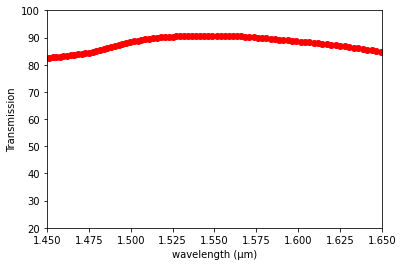

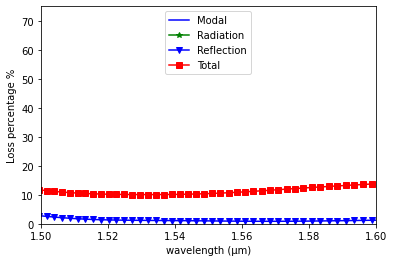

In [199]:
dev_refl_flux = mp.get_fluxes(dev_refl)
Ts1 = []
Ts2 = []
Ts3 = []

wl = []
Rs = []
Tf= [] 
for i in range(nfreq):
    Tf = np.append(Tf,dev_tran_flux[i]/straight_tran_flux[i])    
    Ts1 = np.append(Ts1,abs(trans_coeffs[0,i,1])**2/straight_tran_flux[i]) 
    Ts2 = np.append(Ts2,abs(trans_coeffs[1,i,1])**2/straight_tran_flux[i]) 
    Ts3 = np.append(Ts3,abs(trans_coeffs[2,i,1])**2/straight_tran_flux[i]) 

    Rs = np.append(Rs,-dev_refl_flux[i]/straight_tran_flux[i])
    wl = np.append(wl, 1/flux_freqs[i])
plt.figure()
#plt.plot(wl,abs(Tf),'o-',label='Transmitance')
plt.plot(wl,100*(Ts1+Ts2),'ro-')


plt.axis([1.45, 1.65, 20, 100])

plt.xlabel("wavelength (μm)")
plt.ylabel("Transmission")
plt.savefig("Mode_Transmission.pdf",dpi=200)
plt.figure()
plt.plot(wl,100*(Tf-Ts1),'b-',label='Modal')
plt.axis([1.5, 1.6, 0, 75])
plt.ylabel("Loss percentage %")
plt.plot(wl,100*(1-Tf-Rs),'g*-',label='Radiation')
plt.plot(wl,100*(Rs),'bv-',label='Reflection')
plt.plot(wl,100*(1-Ts1),'rs-',label='Total')
plt.xlabel("wavelength (μm)")
plt.legend(loc="upper center")
#plt.show()
plt.savefig("Losses_Types_Percentages.pdf",dpi=200)

<Figure size 10000x10000 with 0 Axes>

<Figure size 432x288 with 0 Axes>

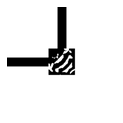

In [200]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 20), dpi=500, facecolor='w', edgecolor='k') 
eps_data = sim.get_array(center=mp.Vector3(), size=cell_size, component=mp.Dielectric)
plt.figure()
#plt.axis([1, 490, 0, 1])
plt.figure(figsize=(2,2))

plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.axis('off')

plt.savefig("Dielecteric.pdf",dpi=500)

In [201]:
100*(Ts1+Ts2+Ts3)

array([81.6724897 , 82.19942532, 82.70532332, 83.18332365, 83.6301961 ,
       84.04710904, 84.4378625 , 84.80632852, 85.15480545, 85.48394934,
       85.79380673, 86.08494517, 86.35890902, 86.61784297, 86.86371477,
       87.09770141, 87.32009704, 87.53069831, 87.7293606 , 87.91637334,
       88.09249356, 88.25871028, 88.41595352, 88.5649428 , 88.70623812,
       88.84041348, 88.96820895, 89.09055506, 89.20846136, 89.32284796,
       89.43442217, 89.54365813, 89.65086239, 89.75625563, 89.85999991,
       89.96214784, 90.06254901, 90.16078163, 90.25616406, 90.34785266,
       90.43498198, 90.51678175, 90.59262479, 90.6620054 , 90.72449009,
       90.77969314, 90.82730432, 90.86715144, 90.89924739, 90.92377289,
       90.94098303, 90.95107476, 90.95408128, 90.94984487, 90.93806682,
       90.91837244, 90.89030202, 90.85316988, 90.8058167 , 90.74637187,
       90.67218731, 90.58006357, 90.46676813, 90.32969742, 90.16743539,
       89.97997443, 89.76849912, 89.53483491, 89.28083318, 89.00